In [7]:
import pandas as pd
import re
import string 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import seaborn as sns #This help in doing plot distribution
import matplotlib.pyplot as plt #This help in doing plot distribution

In [3]:
df=pd.read_csv("Mental-Health-Twitter.csv")
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [4]:
# Overview of dataset
print(df.info()) # Check data types and missing values
print(df.describe())  # Check numerical column statistics
print(df['label'].value_counts())  # Count of each label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB
None
         Unnamed: 0       post_id       user_id     followers       friends  \
count  20000.000000  2.000000e+04  2.000000e+04  20000.000000  20000.000000   
mean    9999.500000  6.874728e+17  3.548623e+16    900.483950    782.428750   
std     5773.647028  1.708396e+17  1.606083e+17   189

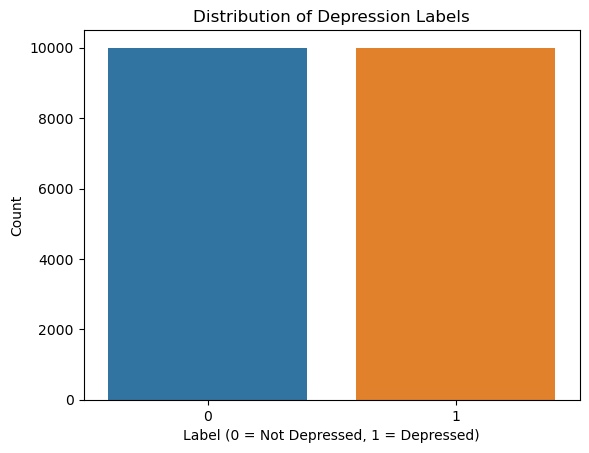

In [8]:
# Plot class distribution
sns.countplot(x=df['label'])
plt.title("Distribution of Depression Labels") 
plt.xlabel("Label (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Count") 
plt.show()

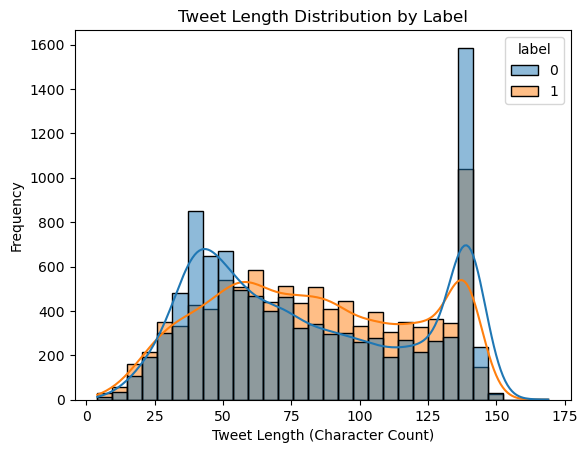

In [9]:
df['tweet_length'] = df['post_text'].apply(lambda x: len(str(x))) # Compare tweet lengths for both labels 
sns.histplot(data=df, x="tweet_length", hue="label", bins=30, kde=True)
plt.title("Tweet Length Distribution by Label") 
plt.xlabel("Tweet Length (Character Count)") 
plt.ylabel("Frequency")
plt.show()

In [10]:
from scipy.stats import ttest_ind

depressed_lengths = df[df['label'] == 1]['tweet_length']
non_depressed_lengths = df[df['label'] == 0]['tweet_length']

t_stat, p_value = ttest_ind(depressed_lengths, non_depressed_lengths)
print(f"T-test p-value: {p_value}")


T-test p-value: 0.05030122761831303


In [12]:
# Drop unnecessary columns 
df = df[['post_text', 'label']]  # I Keep only tweet text and label 
# Remove missing values 
df.dropna(inplace=True)
# download functions to clean Raw texts
nltk.download('stopwords')
nltk.download('punkt') 

def clean_text(text): 
    text = text.lower()  # Conve# Drop unnecessary columns (adjust based on relevance) 
df = df[['post_text', 'label']]  # Keep only tweet text and label 
# Remove missing values 
df.dropna(inplace=True)
# Text cleaning function 
nltk.download('stopwords')
nltk.download('punkt') 

def clean_text(text): 
    text = text.lower()  # Convert to lowercase 
    text = re.sub(r'http\S+', '', text)  # Remove URLs 
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags 
   # Keep only ! and ? while removing other punctuation
    text = text.translate(str.maketrans('', '', string.punctuation.replace("!", "").replace("?", "")))
 
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')] # Remove stopwords 
    return " ".join(words) 
# Apply cleaning function
df['clean_text'] = df['post_text'].apply(clean_text) 
# Show cleaned data 
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\twize\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twize\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\twize\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twize\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,post_text,label,clean_text
0,It's just over 2 years since I was diagnosed w...,1,2 years since diagnosed today im taking moment...
1,"It's Sunday, I need a break, so I'm planning t...",1,sunday need break im planning spend little tim...
2,Awake but tired. I need to sleep but my brain ...,1,awake tired need sleep brain ideas
3,RT @SewHQ: #Retro bears make perfect gifts and...,1,rt bears make perfect gifts great beginners ! ...
4,It’s hard to say whether packing lists are mak...,1,’ hard say whether packing lists making life e...
